# Michaelis-Menten Enzyme Kinetics

1. [Background](#Background)
2. [Building the Model](#Building-the-Model)
3. [Simulation GUI](#Simulation-GUI)
4. [Plotting GUI](#Plotting-GUI)

In [1]:
versioninfo()

Julia Version 0.5.2
Commit f4c6c9d4bb (2017-05-06 16:34 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin13.4.0)
  CPU: Intel(R) Core(TM) i7-4750HQ CPU @ 2.00GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.7.1 (ORCJIT, haswell)


## Background

Consider a substrate $S$ and an enzyme $E$ that can bind the subsrate according to some rate $k_{1}$ to form the complex $ES$. This process is often assumed to be reversible in the sense that the complex breaks apart into its original constituents $S$ and $E$ according to a rate $k_{2}$. After some amount of time, the enzyme is able to "process" the subsrate to form a protein $P$ according to a rate $k_{3}$. We summarize these reactions as follows:

\begin{gather}
  \text{Binding}      \quad  S + E \overset{k_{1}}{\to} SE, \\
  \text{Dissociation} \quad  ES \overset{k_{2}}{\to} S + E, \\
  \text{Conversion}   \quad  ES \overset{k_{3}}{\to} P + E.
\end{gather}

## Building the Model

It is sometimes convenient to wrap a `Network` using a function of the initial conditions and parameters.

In [2]:
using BioSimulator

In [3]:
function mmek(;S=301, E=120, SE=0, P=0,
                k1=0.00166, k2=0.0001, k3=0.1)
    # Initialize network
    m = Network("Michaelis-Menten")

    # Species Definitions
    m <= Species("S",  S)
    m <= Species("E",  E)
    m <= Species("SE", SE)
    m <= Species("P",  P)

    # Reaction Definitions
    m <= Reaction("Binding",      k1, "S + E --> SE")
    m <= Reaction("Dissociation", k2, "SE --> S + E")
    m <= Reaction("Conversion",   k3, "SE --> E + P")

    return m
end

mmek (generic function with 1 method)

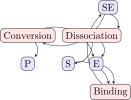

In [4]:
model = mmek()
visualize(model)

## Simulation GUI

We can create a graphical user interface to the model using `generate_gui`, which takes three arguments:

> `model`: an instance of a `Network` type,

> `list_of_species`: the labels of `Species` whose initial values should be exposed, and

> `list_of_reactions`: the labels of `Reaction`s whose rate constant should be exposed.

The GUI will generate input fields for each of the specified values. Furthermore, it generates four fields that tie in to the `algorithm`, `time`, `trials`, and `epochs` arguments of the `simulate` method. After changing the fields, one simply clicks "Run" to execute a simualtion.

In [5]:
result = generate_gui(model, ["S", "E"], ["Dissociation", "Conversion"])

Interact.Textbox{Int64}(2: "input-2" = 301 Int64 ,"S",nothing,301)

Interact.Textbox{Int64}(4: "input-3" = 120 Int64 ,"E",nothing,120)

Interact.Textbox{Float64}(6: "input-4" = 0.0001 Float64 ,"Dissociation",nothing,0.0001)

Interact.Textbox{Float64}(8: "input-5" = 0.1 Float64 ,"Conversion",nothing,0.1)

Interact.Options{:Dropdown,DataType}(11: "input-7" = BioSimulator.SSA DataType ,"algorithm",BioSimulator.SSA,"BioSimulator.SSA",Interact.OptionDict(DataStructures.OrderedDict("BioSimulator.SSA"=>BioSimulator.SSA,"BioSimulator.FRM"=>BioSimulator.FRM,"BioSimulator.NRM"=>BioSimulator.NRM,"BioSimulator.ODM"=>BioSimulator.ODM,"BioSimulator.SAL"=>BioSimulator.SAL),Dict(BioSimulator.FRM=>"BioSimulator.FRM",BioSimulator.ODM=>"BioSimulator.ODM",BioSimulator.SAL=>"BioSimulator.SAL",BioSimulator.NRM=>"BioSimulator.NRM",BioSimulator.SSA=>"BioSimulator.SSA")),Any[],Any[],true,"horizontal")

Interact.Textbox{Float64}(13: "input-8" = 1.0 Float64 ,"time",nothing,1.0)

Interact.Textbox{Int64}(15: "input-9" = 1 Int64 ,"trials",nothing,1)

Interact.Textbox{Int64}(17: "input-10" = 1 Int64 ,"epochs",nothing,1)

Interact.Button{Void}(10: "input-6" = nothing Void ,"Run",nothing)

SimData{4,2,1}
 * species  = ("SE","S","P","E")
 * time     = 1.0
 * epochs   = 2
 * trials   = 1

## Plotting GUI

Given the output of `generate_gui`, one can generate a GUI to the simulation data. Currently we support visualization of mean trajectories and histograms. The "Selected Time" field applies only to `Histogram` plots and specifies the distribution at a time $t$.

In [6]:
plot_interface(result)

Interact.Options{:Dropdown,String}(23: "input-11" = Mean Trajectory String ,"Plot:","Mean Trajectory","Mean Trajectory",Interact.OptionDict(DataStructures.OrderedDict("Mean Trajectory"=>"Mean Trajectory","Histogram"=>"Histogram"),Dict("Mean Trajectory"=>"Mean Trajectory","Histogram"=>"Histogram")),Any[],Any[],true,"horizontal")

Interact.Options{:Dropdown,Symbol}(25: "input-12" = SE Symbol ,"Selected Species:",:SE,"SE",Interact.OptionDict(DataStructures.OrderedDict("SE"=>:SE,"S"=>:S,"P"=>:P,"E"=>:E),Dict(:SE=>"SE",:S=>"S",:P=>"P",:E=>"E")),Any[],Any[],true,"horizontal")

Interact.Options{:Dropdown,Float64}(27: "input-13" = 0.0 Float64 ,"Selected Time:",0.0,"0.0",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"1.0"=>1.0),Dict(0.0=>"0.0",1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Button{Void}(29: "input-14" = nothing Void ,"Plot",nothing)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 1.0 
 
 
 0 
 
 
 10 
 
 
 20 
 
 
 30 
 
 
 time 
 
 
 mean population size 
 
 
 
 
 
 
 
 
 SE